In [2]:
!unzip /content/archive_4.zip

Archive:  /content/archive_4.zip
  inflating: olivetti_faces.npy      
  inflating: olivetti_faces_target.npy  


In [1]:
# Libraries

import numpy as np
# For plotting faces
import matplotlib.pyplot as plt
from skimage.io import imshow
# Regressors
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
img_ds = np.load("/content/olivetti_faces.npy")
img_ds.shape

(400, 64, 64)

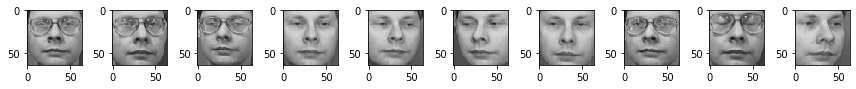

In [4]:
# Sample images of a subject
img_cnt = 10
plt.figure(figsize=(12,12))
for i in range(img_cnt):
    plt.subplot(1,10,i+1)
    x=img_ds[i+30] # 3rd subject
    imshow(x)
plt.show()

In [8]:
targets = np.load("/content/olivetti_faces_target.npy")
targets.shape

(400,)

In [9]:
# Flattening image data set to 2 dimensional array
img_ds_flt = img_ds.reshape(img_ds.shape[0],img_ds.shape[1]*img_ds.shape[2])
# splitting dataset into training and test groups 
targets < 30                
train = img_ds_flt[targets < 30]  # 300 instances
test = img_ds_flt[targets >= 30]  # 100 instances

In [10]:
# Generating 8 random integers between 0 and 100
n_faces = test.shape[0]//12          
face_ids = np.random.randint(0 , 100, size = n_faces)

sub_test = test[face_ids, :]
face_ids

array([84, 52, 43, 78, 44, 76, 46, 90])

In [11]:

n_pixels = img_ds_flt.shape[1]

X_train = train[:, :(n_pixels + 1) // 2]    

y_train = train[:, n_pixels // 2:]

X_test = sub_test[:, :(n_pixels + 1) // 2]
y_test = sub_test[:, n_pixels // 2:]

In [12]:
# Preparing a dictionary of estimators after instantiating each one of them
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10,
                                       max_features=32,     
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),                          
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "multi_gbm" : MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5))
}

y_test_predict = dict()

In [13]:
# Fitting each model by turn and making predictions
for name, estimator in ESTIMATORS.items():     
    estimator.fit(X_train, y_train)                    
    y_test_predict[name] = estimator.predict(X_test)   
                                                       
                                                       
## output shape
image_shape = (64, 64)

# Ridge

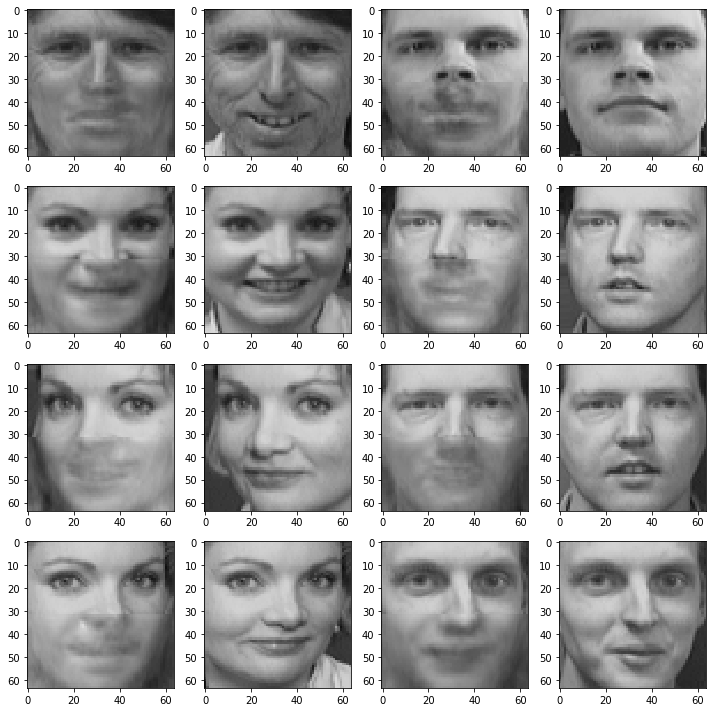

In [14]:
plt.figure(figsize=(10,10))
j = 0
for i in range(n_faces):
    actual_face =    sub_test[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['Ridge'][i]))
    j = j+1
    plt.subplot(4,4,j)
    x = completed_face.reshape(image_shape)
    imshow(x)
    j = j+1
    plt.subplot(4,4,j)
    y = actual_face.reshape(image_shape)
    imshow(y)
  
plt.show()

# Extra Trees

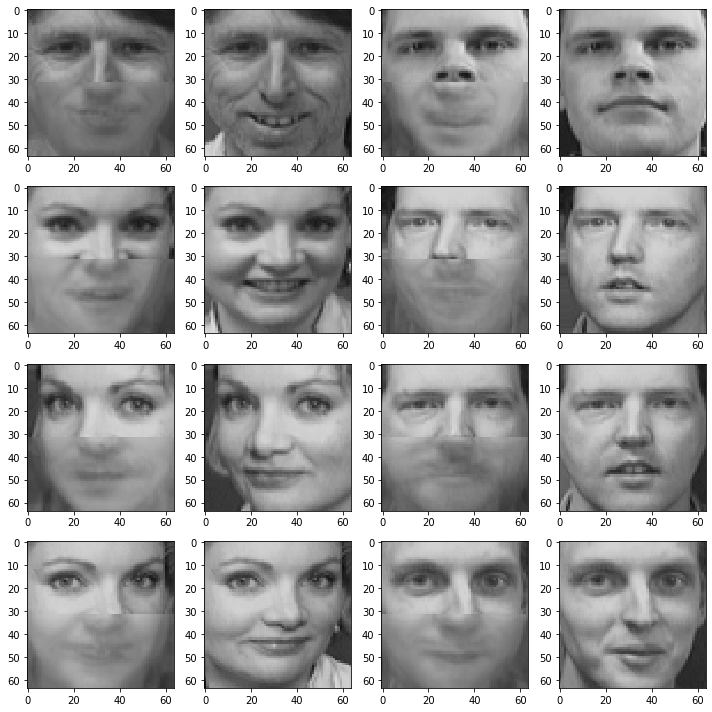

In [15]:
plt.figure(figsize=(10,10))
j = 0
for i in range(n_faces):
    actual_face =    sub_test[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['Extra trees'][i]))
    j = j+1
    plt.subplot(4,4,j)
    x = completed_face.reshape(image_shape)
    imshow(x)
    j = j+1
    plt.subplot(4,4,j)
    y = actual_face.reshape(image_shape)
    imshow(y)
  
plt.show()

# Linear Regression

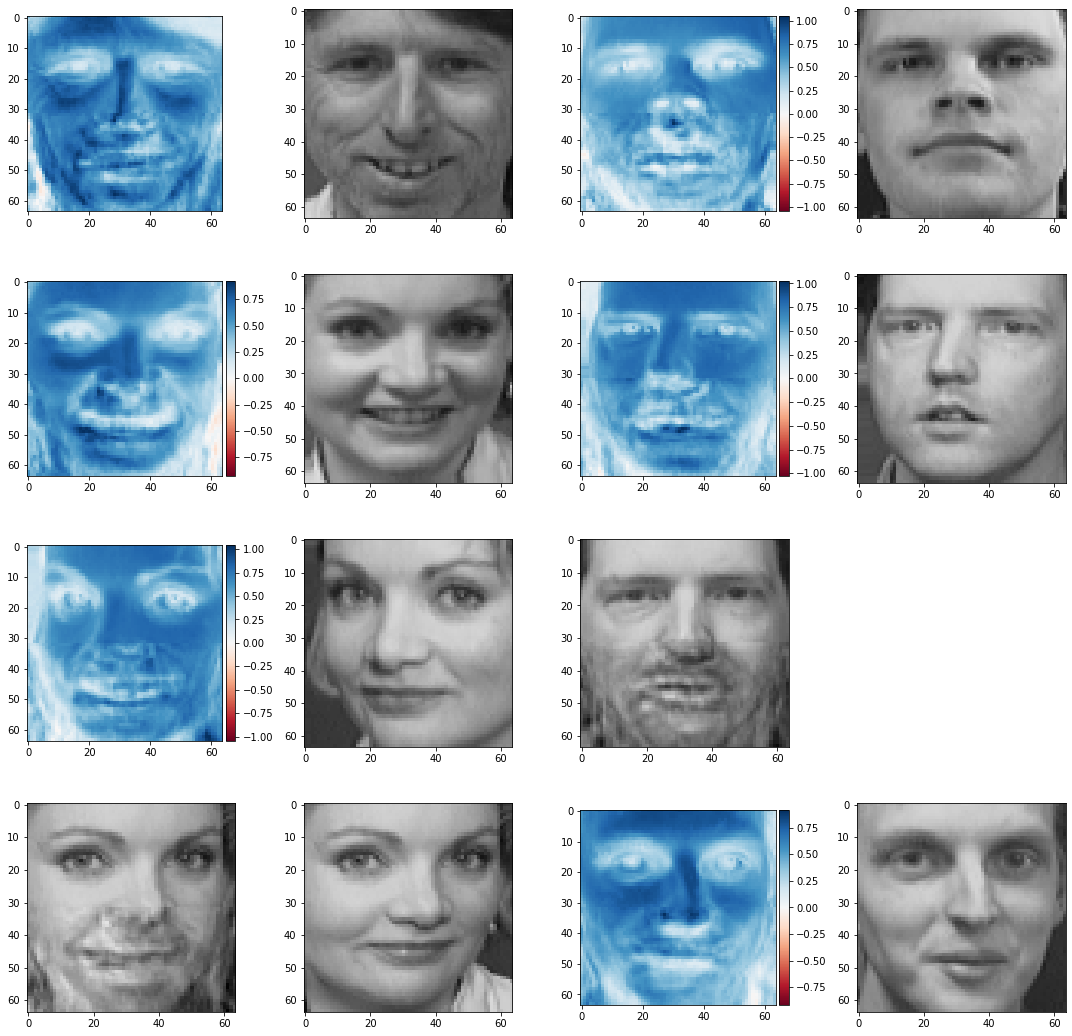

In [16]:
plt.figure(figsize=(15,15))
j = 0
for i in range(n_faces):
    actual_face =    sub_test[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['Linear regression'][i]))
    j = j+1
    plt.subplot(4,4,j)
    x = completed_face.reshape(image_shape)
    imshow(x)
    j = j+1
    plt.subplot(4,4,j)
    y = actual_face
    imshow(y)
  
plt.show()

# KNN

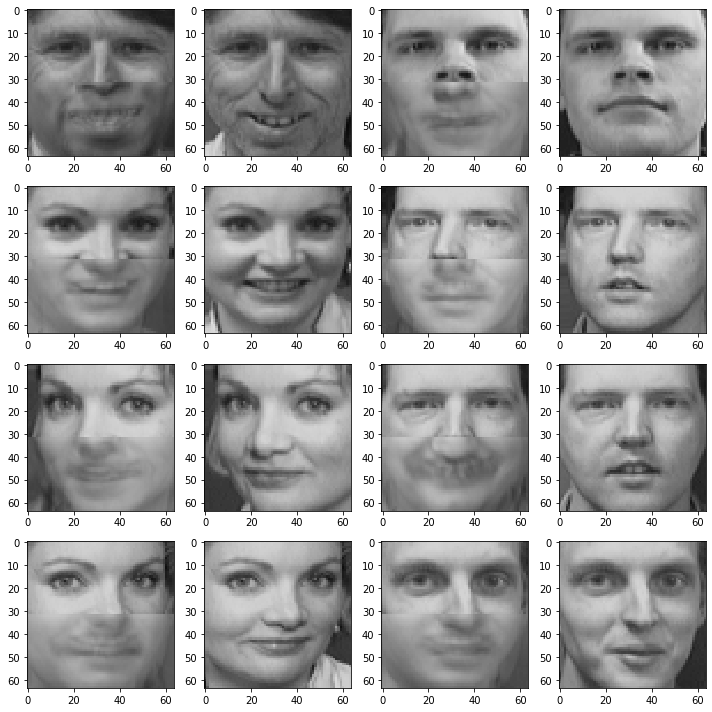

In [17]:
plt.figure(figsize=(10,10))
j = 0
for i in range(n_faces):
    actual_face =    sub_test[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['K-nn'][i]))
    j = j+1
    plt.subplot(4,4,j)
    x = completed_face.reshape(image_shape)
    imshow(x)
    j = j+1
    plt.subplot(4,4,j)
    y = actual_face.reshape(image_shape)
    imshow(y)
  
plt.show()

# MOR

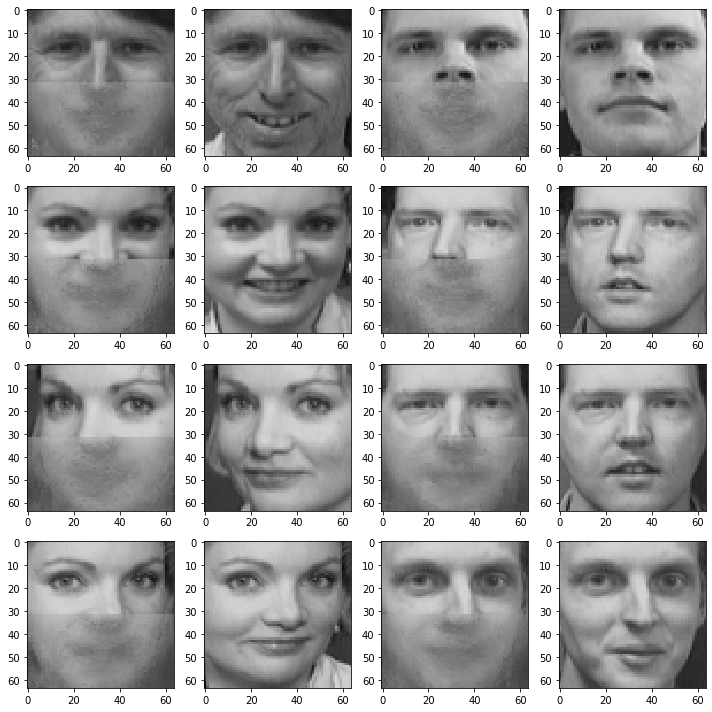

In [18]:
plt.figure(figsize=(10,10))
j = 0
for i in range(n_faces):
    actual_face =    sub_test[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['multi_gbm'][i]))
    j = j+1
    plt.subplot(4,4,j)
    x = completed_face.reshape(image_shape)
    imshow(x)
    j = j+1
    plt.subplot(4,4,j)
    y = actual_face.reshape(image_shape)
    imshow(y)
  
plt.show()